In [1]:
!pip install xgboost

You should consider upgrading via the 'C:\Users\elousiren\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install lightgbm

You should consider upgrading via the 'C:\Users\elousiren\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install catboost

You should consider upgrading via the 'C:\Users\elousiren\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder
from copy import deepcopy
import catboost as cb
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

In [5]:
train = pd.read_csv("C:/Users/elousiren/Desktop/git_presentation/playground/gb/sport/2/assignment_2_train.csv")
test = pd.read_csv("C:/Users/elousiren/Desktop/git_presentation/playground/gb/sport/2/assignment_2_test.csv")

In [6]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
test.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3287000,1,7415038,226.00,W,12473,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3287001,0,7415054,3072.00,W,15651,417.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3287002,0,7415081,319.95,W,13844,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3287003,0,7415111,171.00,W,11556,309.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3287004,0,7415112,107.95,W,10985,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
y_train = train['isFraud'] 
y_test = test['isFraud'] 
x_train = train.drop('isFraud',axis=1)
x_test = test.drop('isFraud',axis=1)


In [9]:
x_train_num = x_train.select_dtypes(include=[np.number])
x_train_cat  = x_train.select_dtypes(include=[np.object])

x_test_num = x_test.select_dtypes(include=[np.number])
x_test_cat  = x_test.select_dtypes(include=[np.object])



x_train_ohe =deepcopy(x_train_cat.fillna('missing'))
x_test_ohe = deepcopy(x_test_cat.fillna('missing'))


cat_columns = list(x_train_ohe.columns)
num_columns = list(x_train_num.columns)

In [10]:
enc =  OneHotEncoder(handle_unknown='error', drop='first',  sparse=False)

x_train_ohe = enc.fit_transform(x_train_ohe)

In [11]:
x_train_ohe = pd.DataFrame(data = x_train_ohe.astype(int),
                                              columns=enc.get_feature_names(list(x_train_cat.columns)))

In [12]:
x_test_ohe = enc.transform(x_test_ohe)
x_test_ohe = pd.DataFrame(data = x_test_ohe.astype(int),
                                              columns=enc.get_feature_names(list(x_test_cat.columns)))

In [13]:
x_train_ohe = pd.concat([x_train_ohe, x_train_num], axis=1, join="inner")
x_test_ohe =pd.concat([x_test_ohe, x_test_num], axis=1, join="inner")


In [14]:
for c in cat_columns:
    x_train[c] = x_train[c].fillna('missing').astype('category')
    x_test[c] = x_test[c].fillna('missing').astype('category')

In [15]:
x_train, x_valid = train_test_split(x_train, train_size=0.75, random_state=42)
x_train_num, x_valid_num = train_test_split(x_train_num, train_size=0.75, random_state=42)
x_train_ohe, x_valid_ohe = train_test_split(x_train_ohe, train_size=0.75, random_state=42)

y_train, y_valid = train_test_split(y_train, train_size=0.75, random_state=42)

В домашнем задании, будем обучать разные алгоритмы машинного обучения. Для этого, нужно предварительно зафиксировать схему валидации решения (можете выбрать любую, которую знаете). Выбранную схему валидации нужно использовать во всех задачах этого домашнего задания. Метрика качества - ROC AUC, целевая переменная - isFraud.


### Задание 1: отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [16]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 2000,
    "reg_lambda": 10,
    "max_depth": 6,
    "gamma": 10,
    "nthread": 6,
    "seed": 42
}


In [17]:
xgb_num = xgb.XGBClassifier(**params)
xgb_num.fit(
    X=x_train_num,
    y=y_train,
    eval_set=[(x_train_num, y_train), (x_valid_num, y_valid)],
    early_stopping_rounds=100,
    eval_metric="auc",
    verbose=50
)

C:\Users\elousiren\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72687	validation_1-auc:0.71306
[50]	validation_0-auc:0.90849	validation_1-auc:0.89267
[100]	validation_0-auc:0.92809	validation_1-auc:0.90707
[150]	validation_0-auc:0.92844	validation_1-auc:0.90736
[200]	validation_0-auc:0.92844	validation_1-auc:0.90736
[202]	validation_0-auc:0.92844	validation_1-auc:0.90736


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=10, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2000, n_jobs=6, nthread=6,
              num_parallel_tree=1, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=True,
              validate_parameters=1, ...)

### Задание 2: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

In [18]:
xgb_ohe = xgb.XGBClassifier(**params)
xgb_ohe.fit(
    X=x_train_ohe,
    y=y_train,
    eval_set=[(x_train_ohe, y_train), (x_valid_ohe, y_valid)],
    early_stopping_rounds=100,
    eval_metric="auc",
    verbose=50
)

[0]	validation_0-auc:0.72687	validation_1-auc:0.71306
[50]	validation_0-auc:0.91730	validation_1-auc:0.89891
[100]	validation_0-auc:0.93629	validation_1-auc:0.91506
[150]	validation_0-auc:0.93629	validation_1-auc:0.91506
[196]	validation_0-auc:0.93629	validation_1-auc:0.91506


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=10, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2000, n_jobs=6, nthread=6,
              num_parallel_tree=1, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=True,
              validate_parameters=1, ...)

### Задание 4: для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [19]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 4000,
    "n_jobs": -1,
    "seed": 42
}

In [20]:
lgbm_num = lgb.LGBMClassifier(**params)
lgbm_num.fit(
    X=x_train_num,
    y=y_train,
    eval_set=[(x_train_num, y_train), (x_valid_num, y_valid)],
    early_stopping_rounds=100,
    eval_metric="auc",
    verbose=50
)

C:\Users\elousiren\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\elousiren\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	training's auc: 0.946627	valid_1's auc: 0.915446
[100]	training's auc: 0.970541	valid_1's auc: 0.931533
[150]	training's auc: 0.980197	valid_1's auc: 0.937927
[200]	training's auc: 0.986324	valid_1's auc: 0.942122
[250]	training's auc: 0.990469	valid_1's auc: 0.944406
[300]	training's auc: 0.99347	valid_1's auc: 0.946134
[350]	training's auc: 0.995155	valid_1's auc: 0.948033
[400]	training's auc: 0.996513	valid_1's auc: 0.949623
[450]	training's auc: 0.997727	valid_1's auc: 0.951215
[500]	training's auc: 0.998443	valid_1's auc: 0.952745
[550]	training's auc: 0.99886	valid_1's auc: 0.953547
[600]	training's auc: 0.999175	valid_1's auc: 0.95425
[650]	training's auc: 0.999471	valid_1's auc: 0.955065
[700]	training's auc: 0.99964	valid_1's auc: 0.95555
[750]	training's auc: 0.999774	valid_1's auc: 0.955942
[800]	training's auc: 0.999906	valid_1's auc: 0.956237
[850]	training's auc: 0.999952	valid_1's auc: 0.956445
[900]	training's auc: 0.999963	valid_1's auc: 0.956376
[950]	training's

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='auc', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=4000, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, seed=42, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

### Задание 5: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

In [21]:
lgbm_ohe = lgb.LGBMClassifier(**params)
lgbm_ohe.fit(
    X=x_train_ohe,
    y=y_train,
    eval_set=[(x_train_ohe, y_train), (x_valid_ohe, y_valid)],
    early_stopping_rounds=100,
    eval_metric="auc",
    verbose=50
)

[50]	training's auc: 0.953978	valid_1's auc: 0.924618
[100]	training's auc: 0.975915	valid_1's auc: 0.938205
[150]	training's auc: 0.985113	valid_1's auc: 0.943581
[200]	training's auc: 0.990139	valid_1's auc: 0.948069
[250]	training's auc: 0.993713	valid_1's auc: 0.951387
[300]	training's auc: 0.995546	valid_1's auc: 0.953489
[350]	training's auc: 0.997207	valid_1's auc: 0.95485
[400]	training's auc: 0.997965	valid_1's auc: 0.955814
[450]	training's auc: 0.998632	valid_1's auc: 0.956579
[500]	training's auc: 0.999192	valid_1's auc: 0.957125
[550]	training's auc: 0.999367	valid_1's auc: 0.957659
[600]	training's auc: 0.999606	valid_1's auc: 0.958395
[650]	training's auc: 0.999819	valid_1's auc: 0.958775
[700]	training's auc: 0.999905	valid_1's auc: 0.95864


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='auc', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=4000, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, seed=42, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

### Задание 6: обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

In [22]:
lgbm_cat = lgb.LGBMClassifier(**params)
lgbm_cat.fit(
    X=x_train,
    y=y_train,
    eval_set=[(x_train, y_train), (x_valid, y_valid)],
    early_stopping_rounds=100,
    eval_metric="auc",
    verbose=50
)



C:\Users\elousiren\anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\elousiren\anaconda3\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[50]	training's auc: 0.952976	valid_1's auc: 0.92313
[100]	training's auc: 0.974496	valid_1's auc: 0.93616
[150]	training's auc: 0.984668	valid_1's auc: 0.944057
[200]	training's auc: 0.990408	valid_1's auc: 0.947138
[250]	training's auc: 0.994031	valid_1's auc: 0.95119
[300]	training's auc: 0.995759	valid_1's auc: 0.952798
[350]	training's auc: 0.997278	valid_1's auc: 0.954511
[400]	training's auc: 0.998175	valid_1's auc: 0.955273
[450]	training's auc: 0.998921	valid_1's auc: 0.956367
[500]	training's auc: 0.999231	valid_1's auc: 0.956541
[550]	training's auc: 0.999476	valid_1's auc: 0.95698
[600]	training's auc: 0.999687	valid_1's auc: 0.957586
[650]	training's auc: 0.99977	valid_1's auc: 0.957814
[700]	training's auc: 0.99983	valid_1's auc: 0.958725
[750]	training's auc: 0.999863	valid_1's auc: 0.959016
[800]	training's auc: 0.999941	valid_1's auc: 0.959104
[850]	training's auc: 0.999978	valid_1's auc: 0.960004
[900]	training's auc: 0.999988	valid_1's auc: 0.959919
[950]	training's 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='auc', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=4000, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, seed=42, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

### Вывод
Качество стало незначительно лучше при внутренней обработке категориальных признаков, а скорость поиска уменьшилась

### Задание 7: для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [56]:
params = {
    "n_estimators": 100000,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 100,
    "max_depth": 4,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 50,
    "thread_count": 6,
    "random_seed": 42
}

In [57]:
cat_num = cb.CatBoostClassifier(**params)
cat_num.fit(x_train_num, y_train,
          eval_set=[(x_train_num, y_train), (x_valid_num, y_valid)])


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	test: 0.6293419	test1: 0.6183866	best: 0.6183866 (0)	total: 56.4ms	remaining: 1h 34m 2s
100:	test: 0.8549946	test1: 0.8496546	best: 0.8498454 (97)	total: 6.13s	remaining: 1h 41m 7s
200:	test: 0.8698342	test1: 0.8644641	best: 0.8644641 (200)	total: 12.6s	remaining: 1h 44m 20s
300:	test: 0.8792616	test1: 0.8715683	best: 0.8715683 (300)	total: 19.6s	remaining: 1h 48m 7s
400:	test: 0.8823292	test1: 0.8746614	best: 0.8746647 (393)	total: 26.1s	remaining: 1h 48m 12s
500:	test: 0.8831694	test1: 0.8750899	best: 0.8750899 (500)	total: 32.1s	remaining: 1h 46m 6s
600:	test: 0.8856045	test1: 0.8768653	best: 0.8768653 (600)	total: 38.2s	remaining: 1h 45m 13s
700:	test: 0.8874616	test1: 0.8783078	best: 0.8783078 (699)	total: 44.2s	remaining: 1h 44m 14s
800:	test: 0.8891793	test1: 0.8797012	best: 0.8797019 (799)	total: 50.2s	remaining: 1h 43m 42s
900:	test: 0.8907398	test1: 0.8810892	best: 0.8810892 (900)	total: 56.3s	remaining: 1h 43m 16s
1000:	test: 0.8920940	test1: 0.8823536	best: 0.8823536 (10

8500:	test: 0.9242470	test1: 0.9080467	best: 0.9080468 (8499)	total: 8m 10s	remaining: 1h 28m 3s
8600:	test: 0.9244771	test1: 0.9081866	best: 0.9081918 (8595)	total: 8m 16s	remaining: 1h 27m 54s
8700:	test: 0.9246802	test1: 0.9083634	best: 0.9083653 (8693)	total: 8m 21s	remaining: 1h 27m 44s
8800:	test: 0.9248548	test1: 0.9084710	best: 0.9084710 (8800)	total: 8m 27s	remaining: 1h 27m 35s
8900:	test: 0.9250351	test1: 0.9085979	best: 0.9086023 (8894)	total: 8m 32s	remaining: 1h 27m 27s
9000:	test: 0.9254140	test1: 0.9089227	best: 0.9089227 (9000)	total: 8m 38s	remaining: 1h 27m 19s
9100:	test: 0.9258016	test1: 0.9091855	best: 0.9091856 (9097)	total: 8m 44s	remaining: 1h 27m 13s
9200:	test: 0.9259275	test1: 0.9093025	best: 0.9093027 (9192)	total: 8m 49s	remaining: 1h 27m 1s
9300:	test: 0.9259446	test1: 0.9093171	best: 0.9093210 (9289)	total: 8m 54s	remaining: 1h 26m 52s
9400:	test: 0.9260046	test1: 0.9093498	best: 0.9093529 (9385)	total: 8m 59s	remaining: 1h 26m 42s
9500:	test: 0.9263485	

### Задание 8: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

In [58]:
cat_ohe = cb.CatBoostClassifier(**params)
cat_ohe.fit(x_train_ohe, y_train,
          eval_set=[(x_train_ohe, y_train), (x_valid_ohe, y_valid)])


0:	test: 0.6287488	test1: 0.6201820	best: 0.6201820 (0)	total: 57ms	remaining: 1h 34m 55s
100:	test: 0.8598752	test1: 0.8536731	best: 0.8537286 (99)	total: 5.98s	remaining: 1h 38m 31s
200:	test: 0.8751407	test1: 0.8680915	best: 0.8680915 (200)	total: 12.3s	remaining: 1h 41m 41s
300:	test: 0.8851936	test1: 0.8765013	best: 0.8765013 (300)	total: 18.6s	remaining: 1h 42m 55s
400:	test: 0.8912657	test1: 0.8817491	best: 0.8817491 (400)	total: 24.9s	remaining: 1h 42m 59s
500:	test: 0.8922608	test1: 0.8823342	best: 0.8823369 (491)	total: 30.5s	remaining: 1h 40m 48s
600:	test: 0.8937575	test1: 0.8836876	best: 0.8836876 (600)	total: 36.2s	remaining: 1h 39m 44s
700:	test: 0.8953729	test1: 0.8850249	best: 0.8850249 (699)	total: 41.9s	remaining: 1h 38m 50s
800:	test: 0.8976817	test1: 0.8868237	best: 0.8868237 (800)	total: 47.6s	remaining: 1h 38m 17s
900:	test: 0.9003594	test1: 0.8891787	best: 0.8891787 (900)	total: 53.4s	remaining: 1h 37m 56s
1000:	test: 0.9014160	test1: 0.8900362	best: 0.8900362 (

8500:	test: 0.9312378	test1: 0.9151257	best: 0.9151257 (8500)	total: 8m 12s	remaining: 1h 28m 20s
8600:	test: 0.9314428	test1: 0.9153007	best: 0.9153007 (8600)	total: 8m 18s	remaining: 1h 28m 14s
8700:	test: 0.9317169	test1: 0.9155462	best: 0.9155463 (8699)	total: 8m 24s	remaining: 1h 28m 10s
8800:	test: 0.9319535	test1: 0.9157321	best: 0.9157343 (8796)	total: 8m 30s	remaining: 1h 28m 4s
8900:	test: 0.9321747	test1: 0.9158923	best: 0.9158923 (8900)	total: 8m 35s	remaining: 1h 27m 59s
9000:	test: 0.9323738	test1: 0.9160940	best: 0.9160940 (9000)	total: 8m 41s	remaining: 1h 27m 52s
9100:	test: 0.9325575	test1: 0.9162053	best: 0.9162053 (9100)	total: 8m 47s	remaining: 1h 27m 46s
9200:	test: 0.9328760	test1: 0.9163809	best: 0.9163867 (9197)	total: 8m 53s	remaining: 1h 27m 40s
9300:	test: 0.9331564	test1: 0.9165468	best: 0.9165468 (9300)	total: 8m 58s	remaining: 1h 27m 35s
9400:	test: 0.9333802	test1: 0.9167370	best: 0.9167389 (9397)	total: 9m 4s	remaining: 1h 27m 28s
9500:	test: 0.9336416	

### Задание 9: обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

In [59]:
cat_cat = cb.CatBoostClassifier(**params)
cat_cat.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_valid, y_valid)],
           cat_features = ['ProductCD','card4','card6','P_emaildomain','R_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9'])

0:	test: 0.6178889	test1: 0.6115846	best: 0.6115846 (0)	total: 307ms	remaining: 8h 31m 45s
100:	test: 0.8583318	test1: 0.8534677	best: 0.8539058 (98)	total: 27.9s	remaining: 7h 39m 49s
200:	test: 0.8743035	test1: 0.8677568	best: 0.8677568 (200)	total: 55.4s	remaining: 7h 38m 41s
300:	test: 0.8866200	test1: 0.8764343	best: 0.8764343 (300)	total: 1m 21s	remaining: 7h 31m 39s
400:	test: 0.8917310	test1: 0.8810813	best: 0.8810815 (399)	total: 1m 48s	remaining: 7h 31m 1s
500:	test: 0.8931641	test1: 0.8819754	best: 0.8819754 (500)	total: 2m 15s	remaining: 7h 27m 18s
600:	test: 0.8967286	test1: 0.8852058	best: 0.8852149 (590)	total: 2m 42s	remaining: 7h 27m 58s
700:	test: 0.8977406	test1: 0.8861806	best: 0.8861806 (700)	total: 3m 7s	remaining: 7h 23m 41s
800:	test: 0.8997000	test1: 0.8877655	best: 0.8877655 (800)	total: 3m 34s	remaining: 7h 22m 30s
900:	test: 0.9013321	test1: 0.8891280	best: 0.8891288 (893)	total: 4m 1s	remaining: 7h 21m 48s
1000:	test: 0.9025544	test1: 0.8904163	best: 0.8904

### Вывод
Встроенный метод обработки категориальных признаков catboost без дополнительных настроек ухудшил показатель AUC, но итераций сделал намного меньше.

### Задание 10: построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.

In [60]:
model = [[xgb_num, xgb_ohe], [lgbm_num, lgbm_ohe, lgbm_cat], [cat_num, cat_ohe, cat_cat]]
feature_train = [x_train_num, x_train_ohe, x_train]
feature_test = [x_test_num, x_test_ohe, x_test]

fpr_train_l = []
tpr_train_l = []
fpr_test_l = []
tpr_test_l = []

for clf in model:
    for i, m in enumerate(clf):
        fpr_train, tpr_train, _ = roc_curve(y_train, m.predict_proba(feature_train[i])[:,1])
        fpr_test, tpr_test, _ = roc_curve(y_test, m.predict_proba(feature_test[i])[:,1])
        fpr_train_l.append(fpr_train)
        tpr_train_l.append(tpr_train)
        fpr_test_l.append(fpr_test)
        tpr_test_l.append(tpr_test)    


In [61]:
m = ['','xgb_num','xgb_ohe', 'lgbm_num', 'lgbm_ohe', 'lgbm_cat', 'cat_num', 'cat_ohe', 'cat_cat']

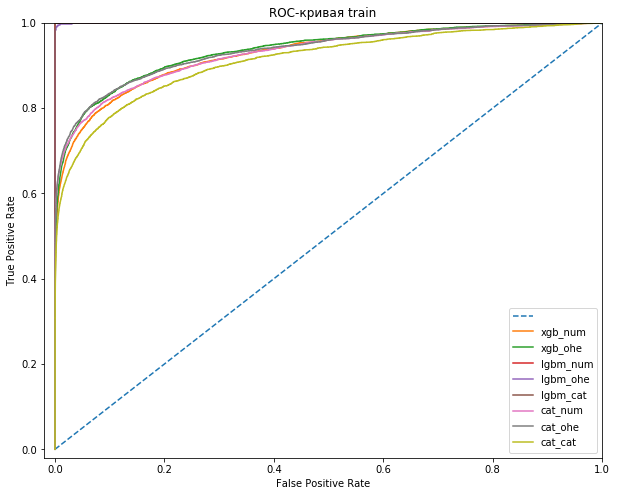

In [62]:

plt.figure( figsize=(10,8))

plt.plot([0, 1], [0, 1], linestyle='--')
for i in range(len(fpr_train_l)):
    plt.plot(fpr_train_l[i], tpr_train_l[i])


plt.legend(m)

plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая train')
plt.show()

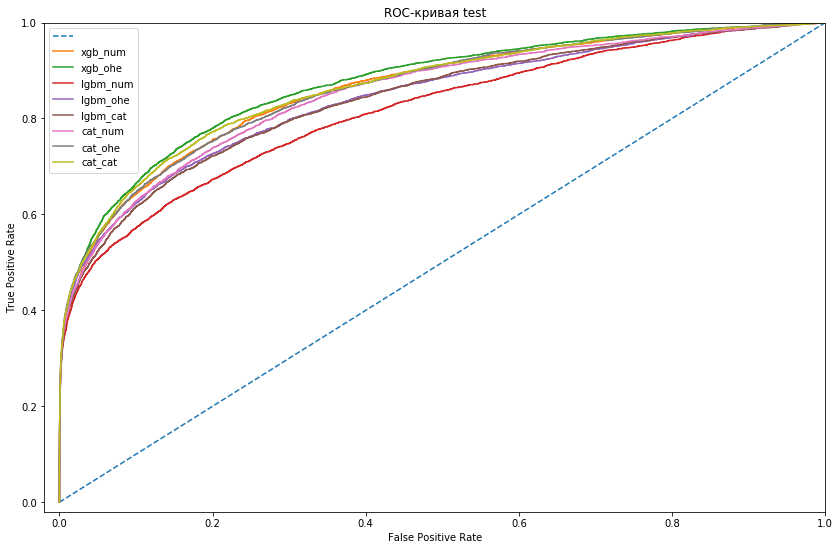

In [63]:

plt.figure( figsize=(14,9))

plt.plot([0, 1], [0, 1], linestyle='--')
for i in range(len(fpr_train_l)):
    plt.plot(fpr_test_l[i], tpr_test_l[i])

plt.legend(m)

plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая test')
plt.show()

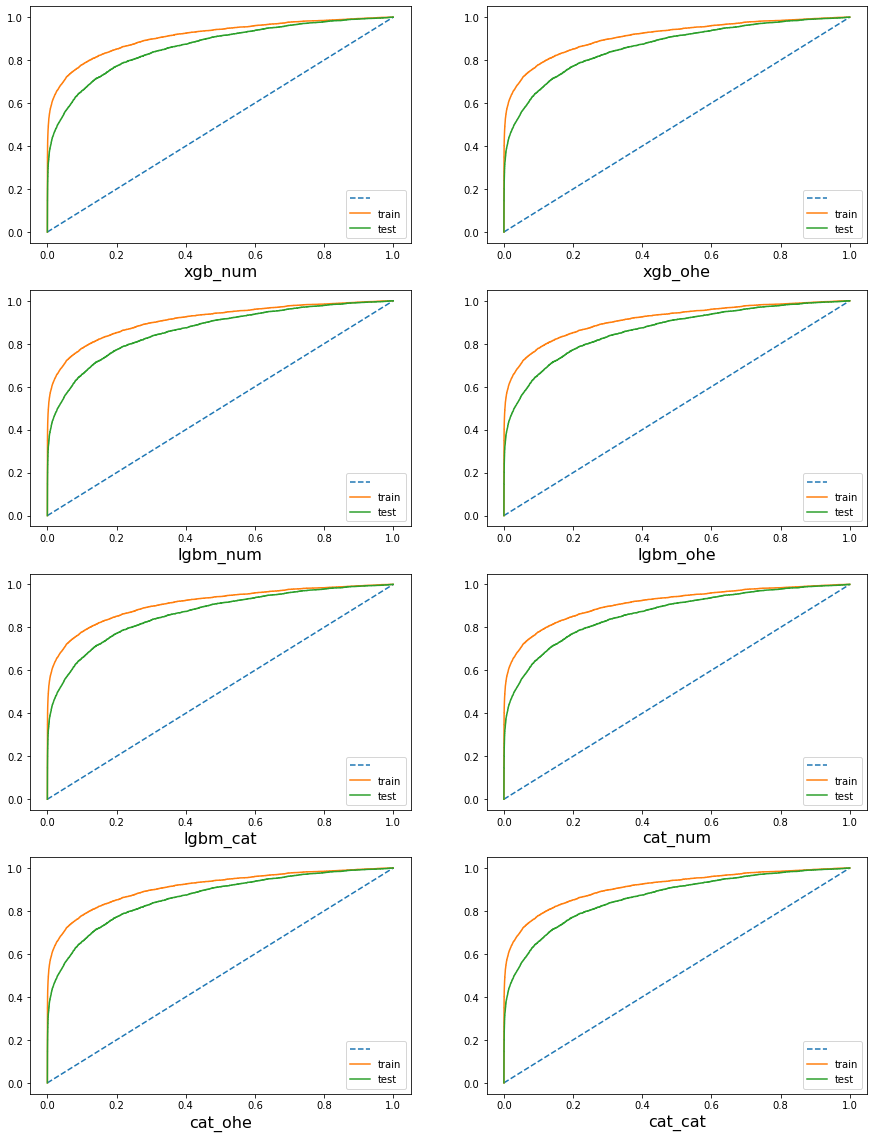

In [64]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
for num in range(len(fpr_train_l)):
    axes[num//2, num%2].plot([0, 1], [0, 1], linestyle='--')
    axes[num//2, num%2].plot(fpr_train_l[i], tpr_train_l[i])
    axes[num//2, num%2].plot(fpr_test_l[i], tpr_test_l[i])
    axes[num//2, num%2].set_xlabel(m[num+1], fontsize=16)
    axes[num//2, num%2].legend(['','train','test'])


## Задание на повторение:
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.

### Задание 1: Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

In [26]:
train['TransactionDT'] = pd.to_datetime(train['TransactionDT'], unit ='s')
test['TransactionDT']  =  pd.to_datetime(test['TransactionDT'], unit ='s')

(array([719163., 719177., 719194., 719208., 719222., 719236., 719253.,
        719267., 719283.]),
 <a list of 9 Text xticklabel objects>)

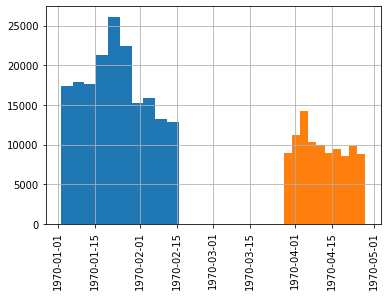

In [27]:
train['TransactionDT'].hist()
test['TransactionDT'].hist()
plt.xticks(rotation='vertical')

Данные тестовой и обучающей выборки в разных временных рамках.
Уместна рабзбиение по времени выборки для валидации. Мне кажется, и обычное случайное разбиение тоже ок.

### Задание 2: построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

In [28]:
train['TransactionH'] = pd.DatetimeIndex(train['TransactionDT']).hour
test['TransactionH']= pd.DatetimeIndex(test['TransactionDT']).hour

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text xticklabel objects>)

<Figure size 720x576 with 0 Axes>

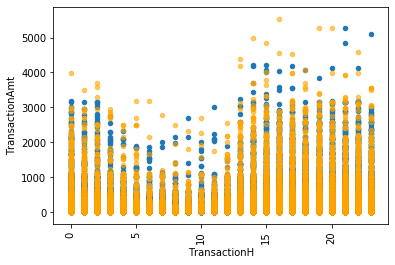

In [29]:
plt.figure( figsize=(10,8))
ax = train.plot.scatter(x ='TransactionH', y =  'TransactionAmt')
test.plot.scatter(x ='TransactionH', y =  'TransactionAmt', ax = ax, c='Orange', alpha = 0.6)
plt.xticks(rotation='vertical')


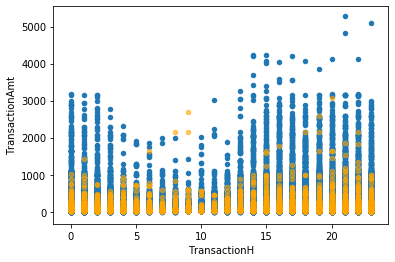

In [30]:
ax =train.loc[train['isFraud']==0].plot.scatter(x ='TransactionH', y =  'TransactionAmt')
train.loc[train['isFraud']==1].plot.scatter(x ='TransactionH', y =  'TransactionAmt', ax = ax, c='Orange', alpha = 0.6)

Видим, что прослеживается зависимость от часа совершения транзакции её суммы. Наблюдаем, что для обучения эта завсимость сохраняется. Для 1 значения целевой переменной этой зависимости нет.

### Задание 3: построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

(array([9.6878e+04, 2.1100e+03, 4.9800e+02, 2.6600e+02, 1.3300e+02,
        8.0000e+01, 1.7000e+01, 1.1000e+01, 5.0000e+00, 3.0000e+00]),
 array([2.5100000e-01, 5.5454890e+02, 1.1088468e+03, 1.6631447e+03,
        2.2174426e+03, 2.7717405e+03, 3.3260384e+03, 3.8803363e+03,
        4.4346342e+03, 4.9889321e+03, 5.5432300e+03]),
 <a list of 10 Patch objects>)

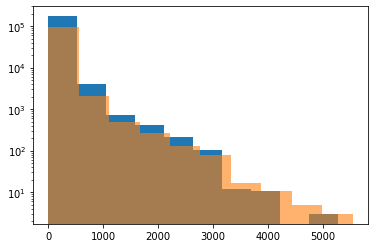

In [31]:
plt.hist(train['TransactionAmt'], log=True)
plt.hist(test['TransactionAmt'], log=True, alpha = 0.6)

Text(0.5, 1.0, 'Normal')

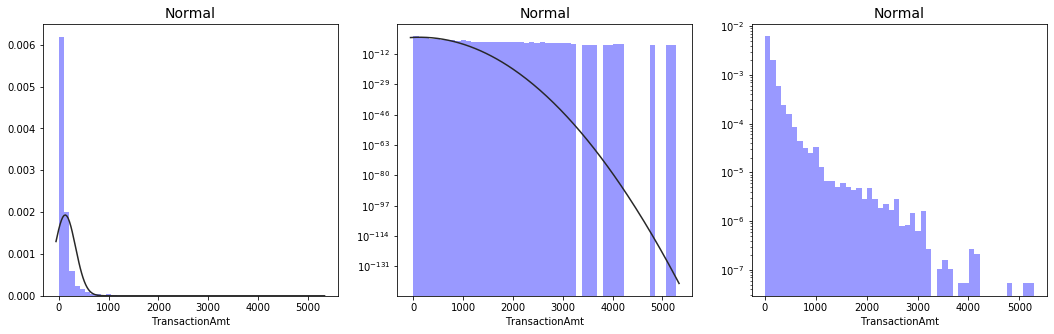

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.distplot(train['TransactionAmt'], kde=False,norm_hist=True,  color="blue", fit=st.norm,ax = axes[1])
axes[1].set_yscale('log')
axes[1].set_title("Normal", fontsize=14)

sns.distplot(train['TransactionAmt'], kde=False,norm_hist=True,  color="blue", fit=st.norm,ax = axes[0])
axes[0].set_title("Normal", fontsize=14)

sns.distplot(train['TransactionAmt'], kde=False,norm_hist=True,  color="blue", ax = axes[2])
axes[2].set_yscale('log')
axes[2].set_title("Normal", fontsize=14)

<span style='background :yellow' >
Почему так получается? на втором графике ???
</span>

Похоже на нормальное распределение, но с большим колличеством транзакций небольших сумм.

### Задание 4: построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.

In [33]:
feat_c = ['ProductCD', 'card4', 'card6']

C:\Users\elousiren\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


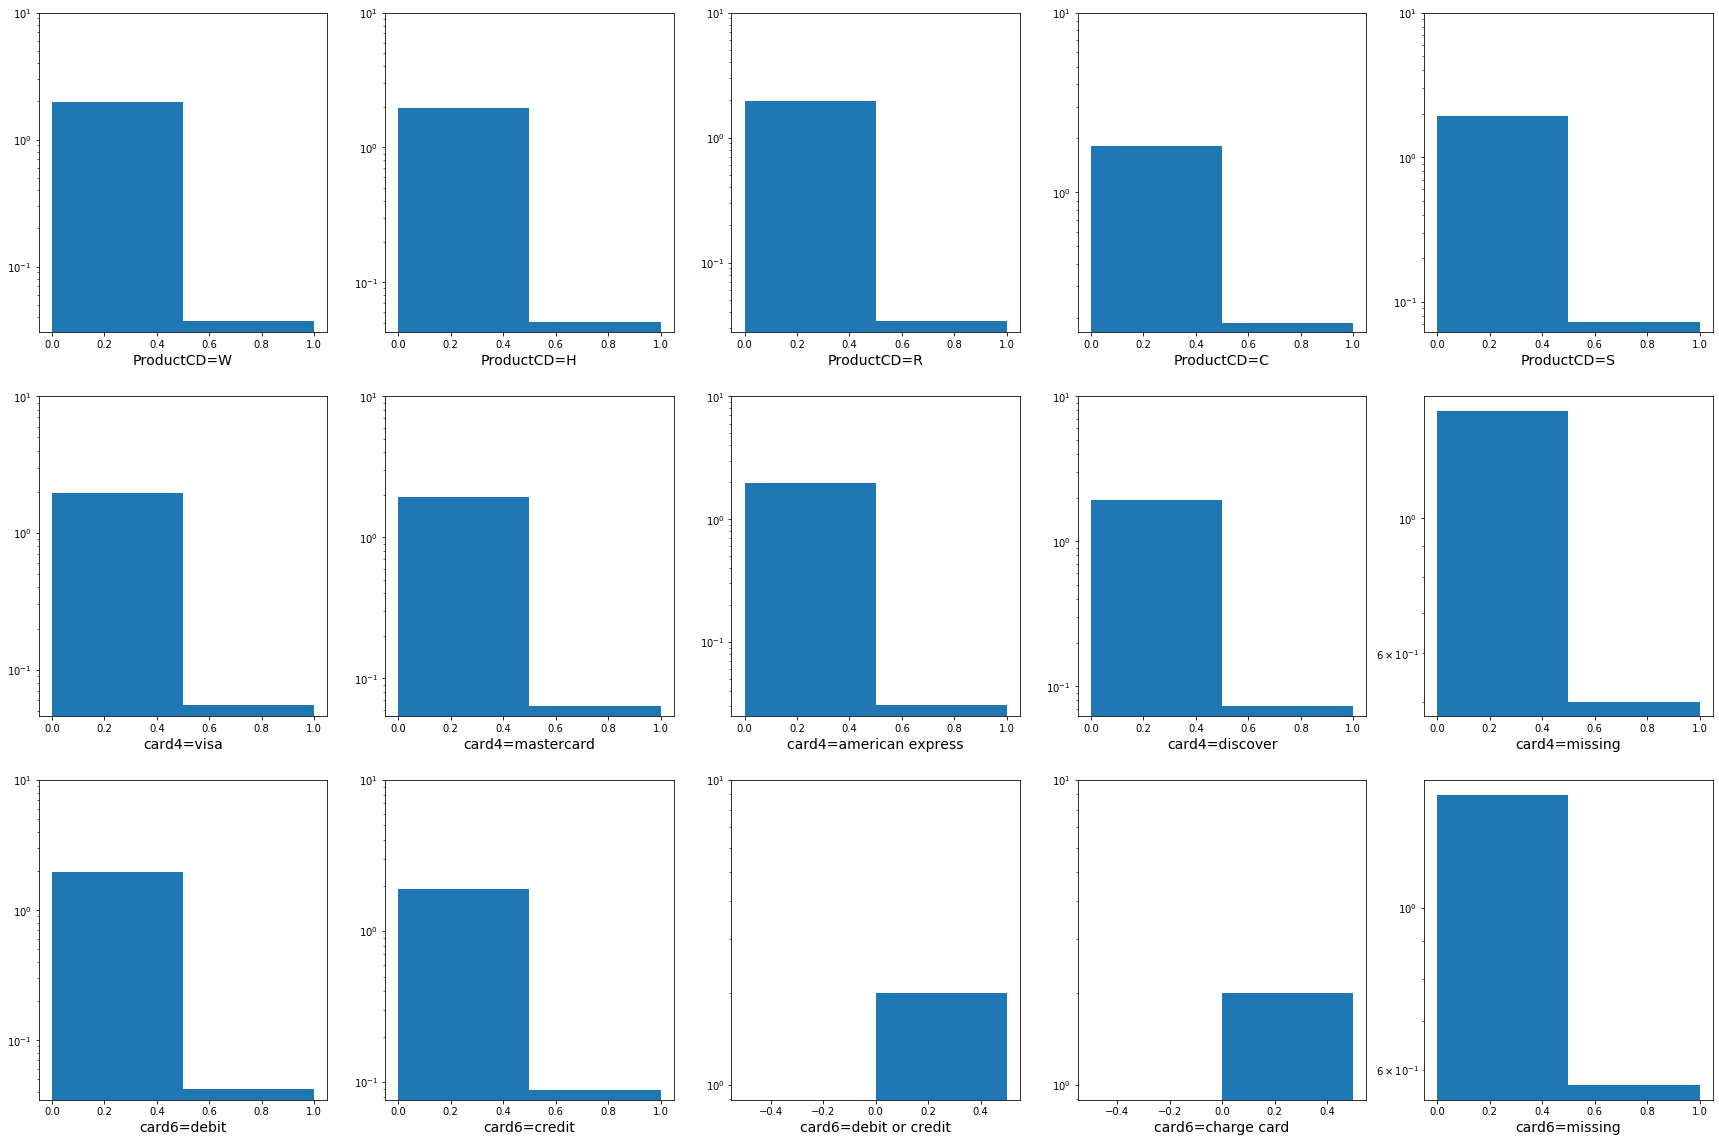

In [76]:
fig, axes = plt.subplots(3, 5, figsize=(30, 20))
num0=0
for feature_name in feat_c:
    for n, feature in enumerate(train[feature_name].fillna('missing').value_counts().reset_index()['index']):
        num=num0+n
        if feature != 'missing':
            axes[num//5, num%5].hist(train.loc[train[feature_name] == feature, 'isFraud'], bins=2,density=True, log= True)
            axes[num//5, num%5].set_xlabel(feature_name+ '='+feature, fontsize=14)
            axes[num//5, num%5].set_ylim(0, 10)
        else:
            axes[num//5, num%5].hist(train.loc[train[feature_name].isnull(), 'isFraud'], bins=2,density=True, log= True)
            axes[num//5, num%5].set_xlabel(feature_name+ '='+feature, fontsize=14)            
    num0=num+1

Видим, что распределение везде похоже, кроме как в значениях card6 = debit or credit / change card. С этими значениями нужно быть на стороже.